# Example Figures from the Article – Based on Preprocessed CSV Data

This notebook loads simulation results from pre-generated CSV files and creates 2×2 plots for the following metrics:

- (A) Hospitalized (critical cases)
- (B) Deceased count
- (C) Cumulative Economic Index
- (D) Average Reward (30-day rolling average)

---

## === Dataset Loading ===

This notebook expects two CSV files located in your Google Drive:

- `bene-baraq_metrics_output.csv`
- `holon_metrics_output.csv`

Each file should contain simulation metrics for different intervention strategies over time.

To load the data, the following code is used:

```python

csv_path = "/content/drive/Name_Your_Drive/path_to_the_data_file", header=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

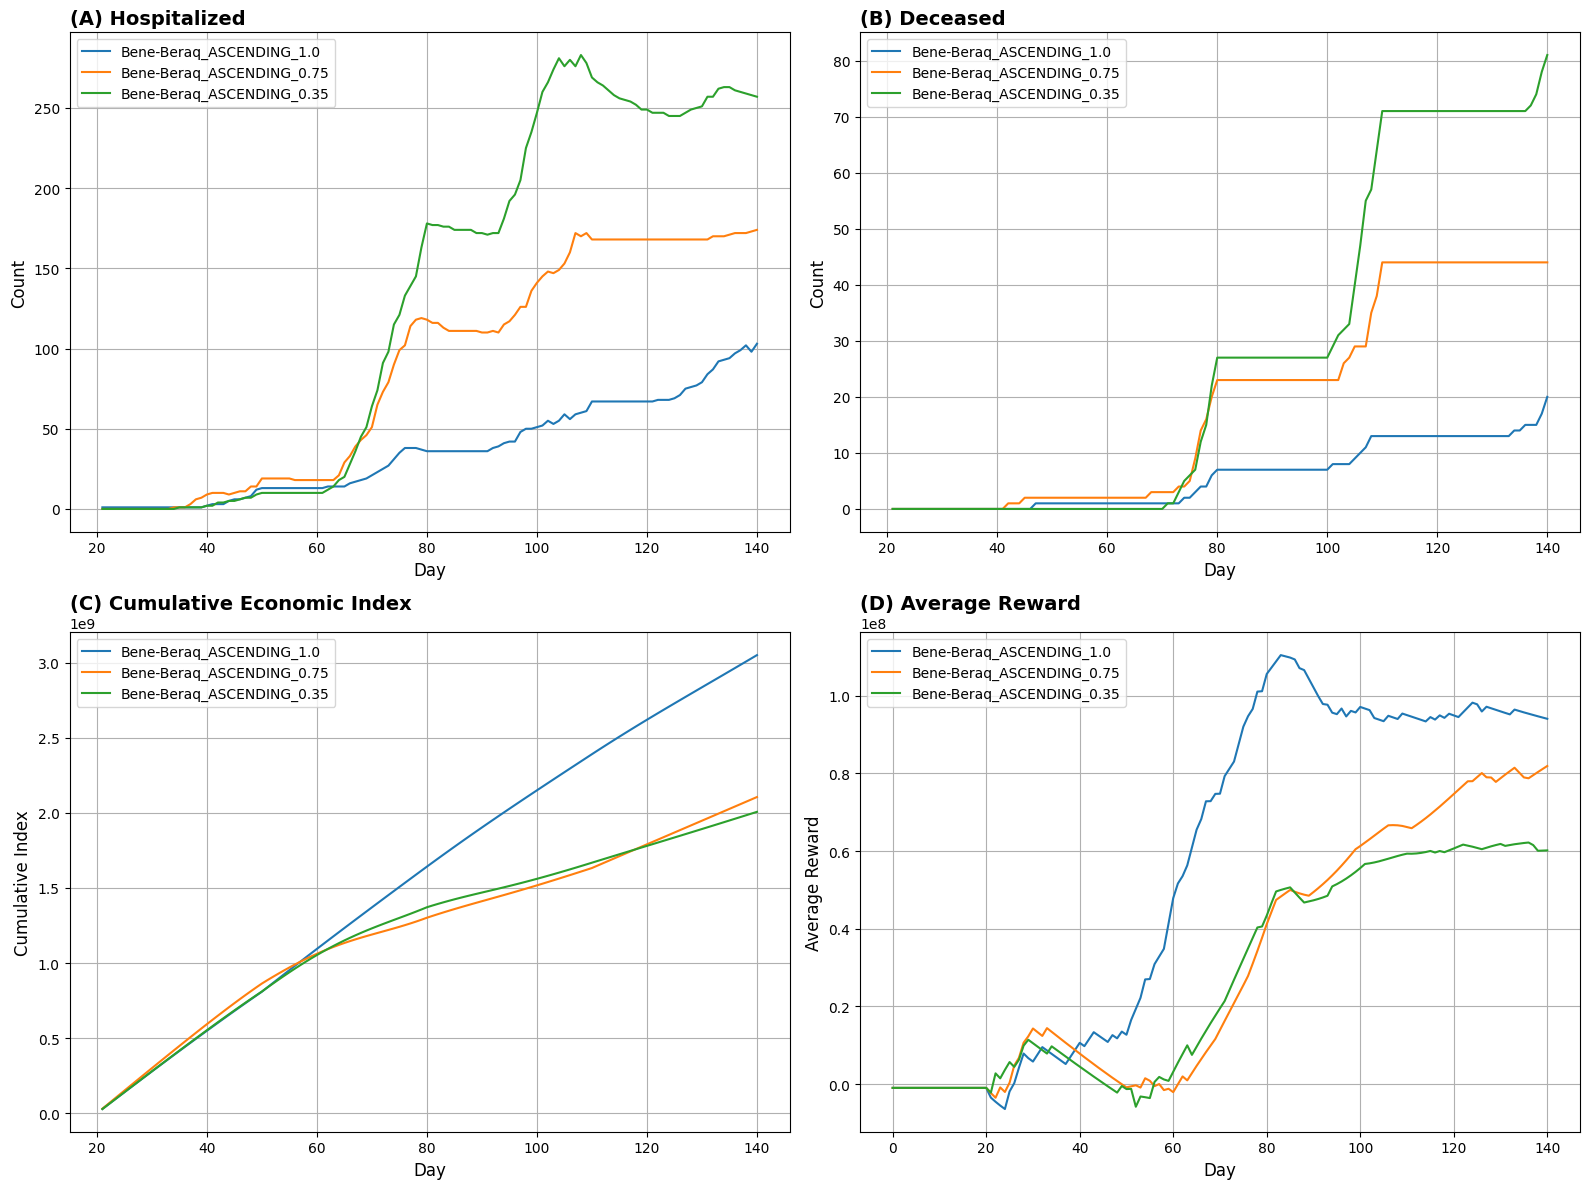

In [11]:
# ===  Import Required Libraries ===
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive, files

# ===  Mount Google Drive ===
drive.mount('/content/drive')

# ===  Load CSV File ===
csv_path = "/content/drive/Name_Your_Drive/bene-baraq_metrics_output.csv"
df = pd.read_csv(csv_path)

# ===  Organize Data by Strategy ===
strategy_names = df["strategy"].unique()
grouped = {name: df[df["strategy"] == name].reset_index(drop=True) for name in strategy_names}

# ===  Smooth REWARD with Rolling Window ===
window_size = 30
merged_reward = pd.DataFrame({"day": range(0, 141)})

for name, subdf in grouped.items():
    # Fill days 0–20 with placeholder values
    filled_pre = pd.Series(-1_000_000, index=range(0, 21))
    reward_series = subdf.set_index("day")["reward"].reindex(range(21, 141), fill_value=0)
    full_series = pd.concat([filled_pre, reward_series])
    smoothed = full_series.rolling(window=window_size, min_periods=1).mean()
    merged_reward[name] = smoothed.values

# === Plot 2x2 Subplots ===
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
titles = ["Hospitalized", "Deceased", "Cumulative Economic Index", "Average Reward"]
ylabels = ["Count", "Count", "Cumulative Index", "Average Reward"]
labels = ["(A)", "(B)", "(C)", "(D)"]

for i, (ax, title, ylabel) in enumerate(zip(axes.flat, titles, ylabels)):
    letter = labels[i]
    if title == "Hospitalized":
        for name, subdf in grouped.items():
            ax.plot(subdf["day"], subdf["critical"], label=name)
    elif title == "Deceased":
        for name, subdf in grouped.items():
            ax.plot(subdf["day"], subdf["deceased"], label=name)
    elif title == "Cumulative Economic Index":
        for name, subdf in grouped.items():
            ax.plot(subdf["day"], subdf["economic_index"], label=name)
    elif title == "Average Reward":
        for name in grouped:
            ax.plot(merged_reward["day"], merged_reward[name], label=name)

    ax.set_title(f"{letter} {title}", loc='left', fontsize=14, weight='bold')
    ax.set_xlabel("Day", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True)
    ax.legend(fontsize=10)

# === Save & Download the Plot ===
plt.tight_layout()
plt.savefig("bene_baraq_metrics_from_csv.png", dpi=300)
files.download("bene_baraq_metrics_from_csv.png")
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

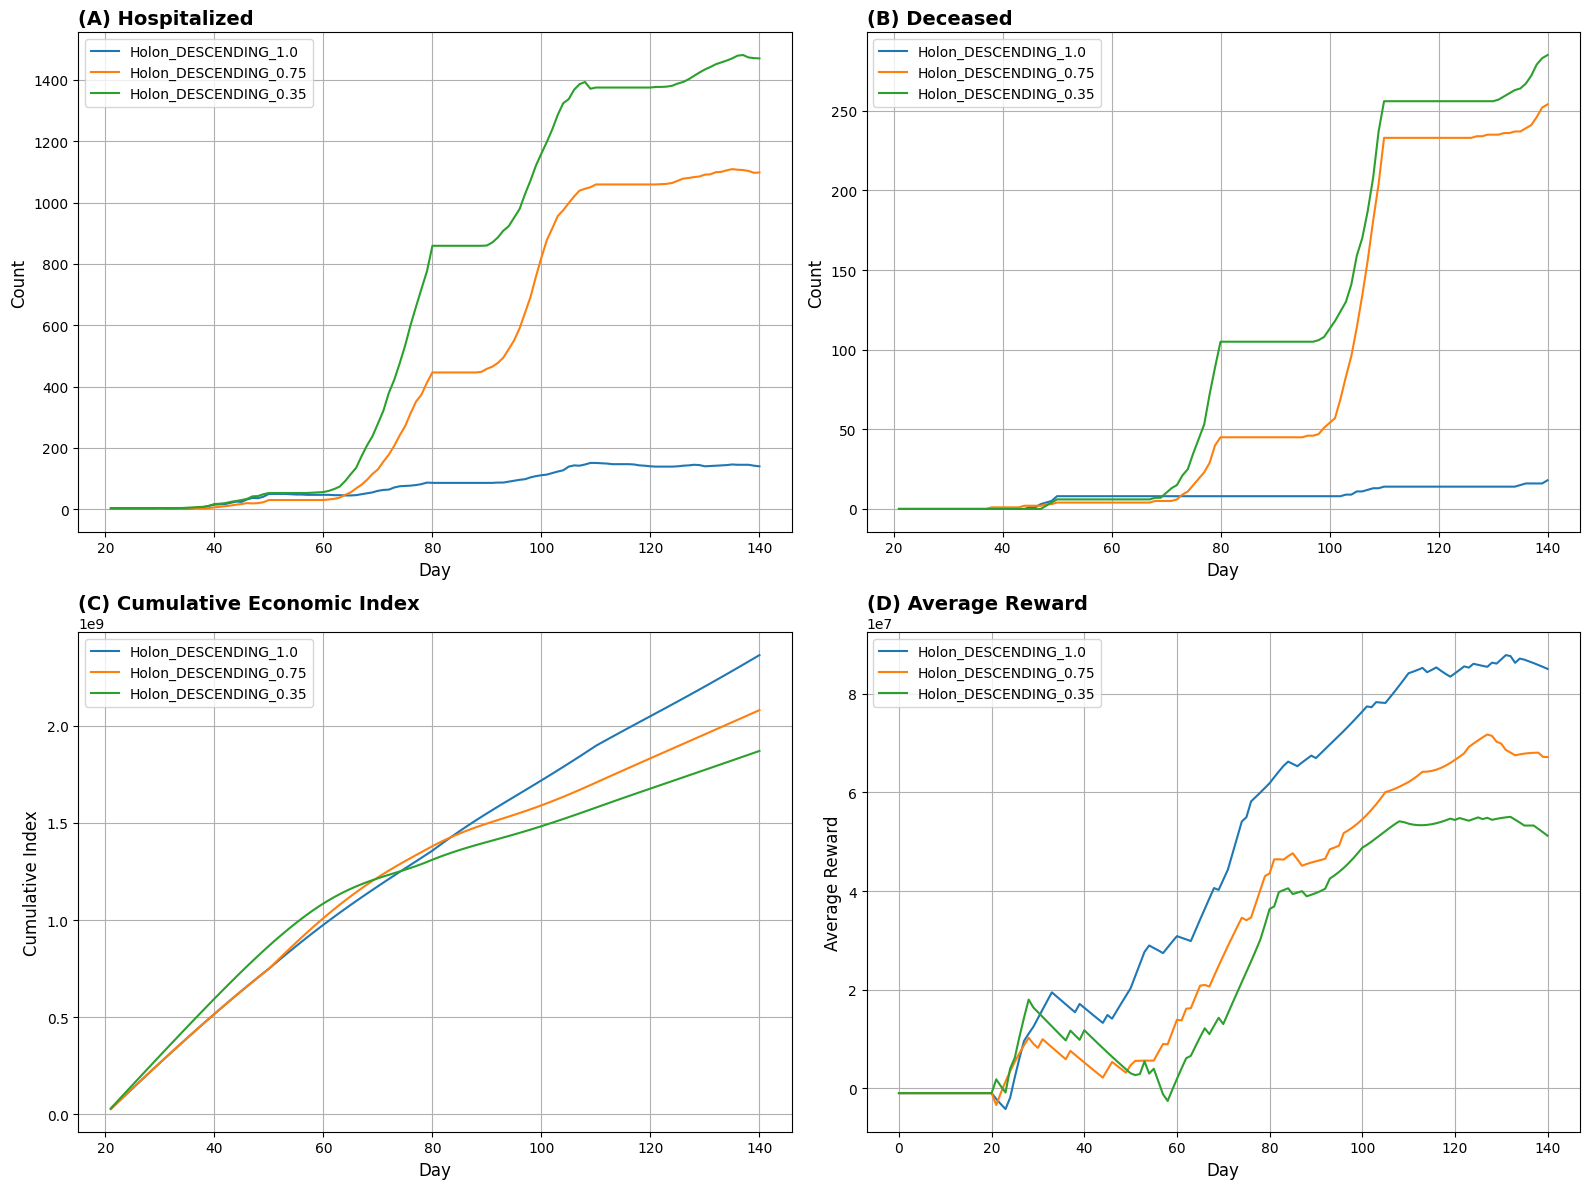

In [12]:
# ===  Import Required Libraries ===
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive, files

# === Mount Google Drive ===
drive.mount('/content/drive')

# ===  Load CSV File ===
csv_path = "/content/drive/Name_Your_Drive/holon_metrics_output.csv"
df = pd.read_csv(csv_path)

# ===  Organize Data by Strategy ===
strategy_names = df['strategy'].unique()
grouped = {name: df[df["strategy"] == name].reset_index(drop=True) for name in strategy_names}

# ===  Smooth REWARD with Rolling Window ===
window_size = 30
merged_reward = pd.DataFrame({'day': range(0, 141)})

for name, subdf in grouped.items():
    # Fill days 0–20 with placeholder values
    filled_pre = pd.Series(-1_000_000, index=range(0, 21))
    reward_series = subdf.set_index("day")["reward"].reindex(range(21, 141), fill_value=0)
    full_series = pd.concat([filled_pre, reward_series])
    smoothed = full_series.rolling(window=window_size, min_periods=1).mean()
    merged_reward[name] = smoothed.values

# ===  Plot 2x2 Subplots ===
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
titles = ["Hospitalized", "Deceased", "Cumulative Economic Index", "Average Reward"]
ylabels = ["Count", "Count", "Cumulative Index", "Average Reward"]
labels = ["(A)", "(B)", "(C)", "(D)"]

for i, (ax, title, ylabel) in enumerate(zip(axes.flat, titles, ylabels)):
    letter = labels[i]
    if title == "Hospitalized":
        for name, subdf in grouped.items():
            ax.plot(subdf["day"], subdf["critical"], label=name)
    elif title == "Deceased":
        for name, subdf in grouped.items():
            ax.plot(subdf["day"], subdf["deceased"], label=name)
    elif title == "Cumulative Economic Index":
        for name, subdf in grouped.items():
            ax.plot(subdf["day"], subdf["economic_index"], label=name)
    elif title == "Average Reward":
        for name in grouped:
            ax.plot(merged_reward["day"], merged_reward[name], label=name)

    ax.set_title(f"{letter} {title}", loc='left', fontsize=14, weight='bold')
    ax.set_xlabel("Day", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True)
    ax.legend(fontsize=10)

# ===  Save and Download the Plot ===
plt.tight_layout()
plt.savefig("holon_metrics_from_csv.png", dpi=300)
files.download("holon_metrics_from_csv.png")
plt.show()